In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


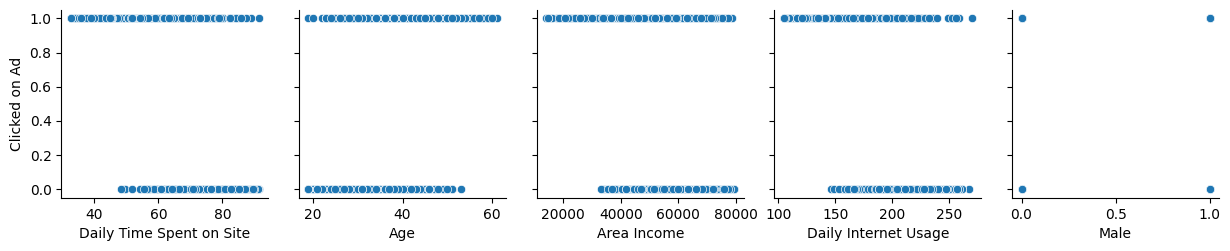

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male'], y_vars=["Clicked on Ad"], kind="scatter")
plt.show()


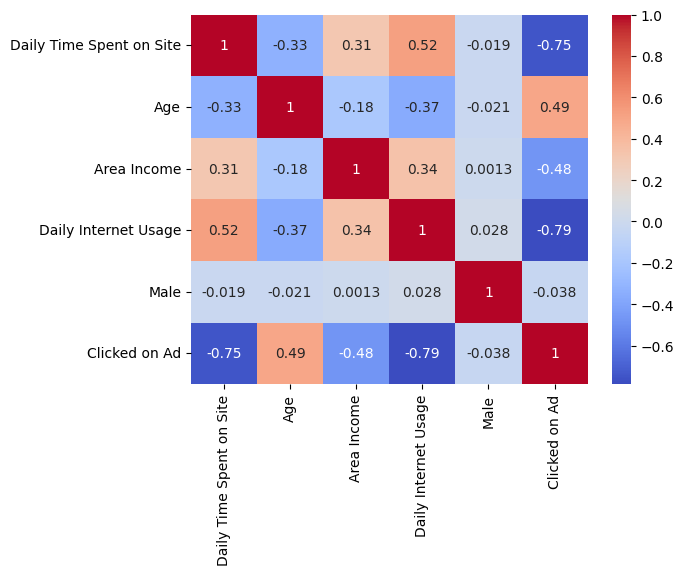

In [13]:
df_numeric = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']]
df_numeric_corr = df_numeric.corr()
sns.heatmap(df_numeric_corr, annot=True, cmap='coolwarm')
plt.show()

In [18]:
df.duplicated().sum()

0

In [20]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

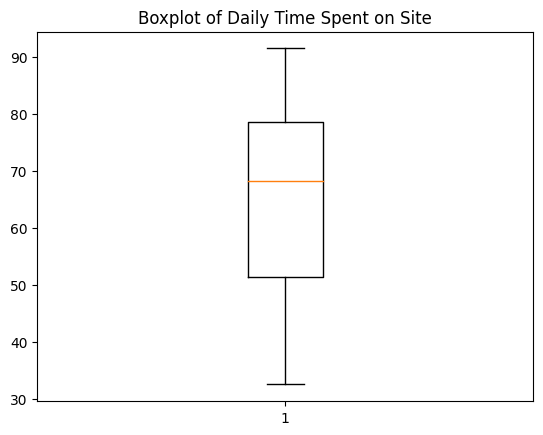

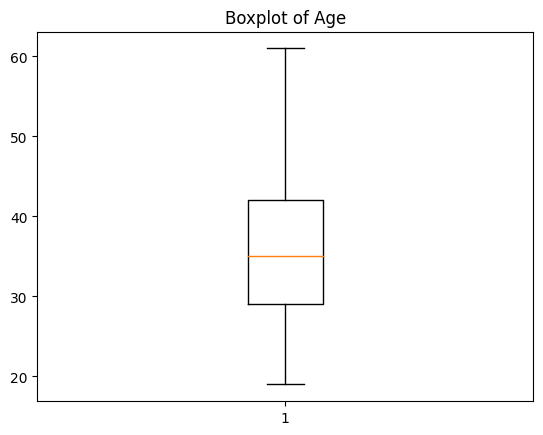

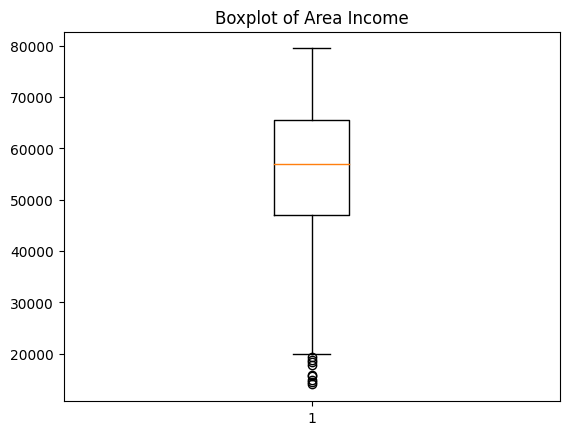

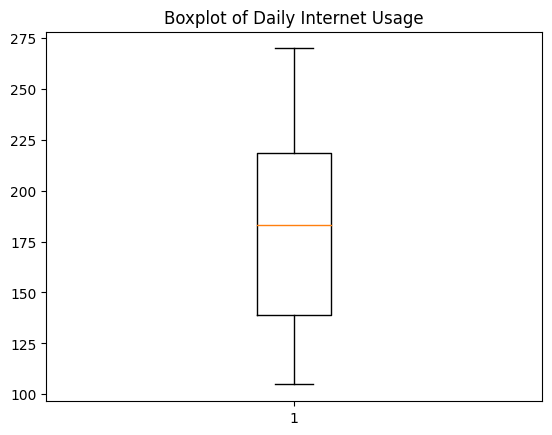

In [22]:
for col in df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


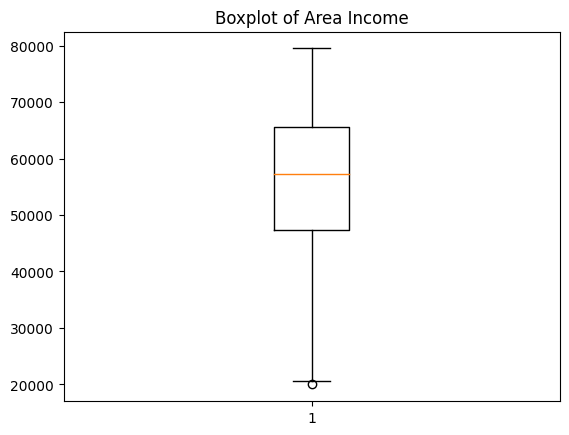

In [24]:
IQR = df['Area Income'].quantile(0.75) - df['Area Income'].quantile(0.25)
lower_bound = df['Area Income'].quantile(0.25) - 1.5 * IQR
upper_bound = df['Area Income'].quantile(0.75) + 1.5 * IQR

df = df[(df['Area Income'] >= lower_bound) & (df['Area Income'] <= upper_bound)]
plt.figure()
plt.boxplot(df['Area Income'])
plt.title(f'Boxplot of Area Income')
plt.show()


In [25]:
del df['Timestamp']

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.loc[:,'City'] = le.fit_transform(df.loc[:,'City'])
df.loc[:,'Ad Topic Line'] = le.fit_transform(df.loc[:,'Ad Topic Line'])
df.loc[:,'Country'] = le.fit_transform(df.loc[:,'Country'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,90,952,0,215,0
1,80.23,31,68441.85,193.77,460,895,1,147,0
2,69.47,26,59785.94,236.50,561,111,0,184,0
3,74.15,29,54806.18,245.89,894,931,1,103,0
4,68.37,35,73889.99,225.58,760,797,0,96,0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=26)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy.round(2)*100}%")


Accuracy: 96.0%


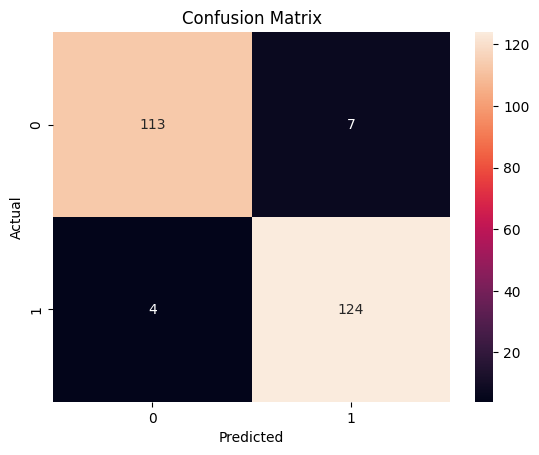

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=df['Clicked on Ad'].unique(), yticklabels=df['Clicked on Ad'].unique())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()